In [1]:
#Import all required libraries for reading data, analysing and visualizing data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder


# Data Analysis

In [2]:
#Read the training & test data
# liver_df = pd.read_csv('/content/liver_patient.csv')
import types
import pandas as pd
liver_df= pd.read_csv('liver.csv')
liver_df.head()
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [74]:
#Top 5 rows of the dataset

liver_df.tail()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,0,0,1
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,1,0,1
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,1,0,1
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,1,0,1
582,38,1.0,0.3,216,21,24,7.3,4.4,1.50,0,0,1


In [4]:
# To get a concise summary of the dataframe

liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Here are the observations from the dataset:

- Only gender is non-numeric veriable. All others are numeric.

- There are 10 features and 1 output - dataset. Value 1 indicates that the patient has liver disease and 0 indicates the patient does not have liver disease.

In [5]:
# Statistical information about NUMERICAL columns in the dataset

liver_df.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


- We can see that there are missing values for Albumin_and_Globulin_Ratio as only 579 entries have valid values indicating 4 missing values.
- Gender has only 2 values - Male/Female

In [6]:
# Features of the dataset (Labels)

liver_df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [7]:
# Check for any null values

liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

- The only data that is null is the Albumin_and_Globulin_Ratio - Only 4 rows are null. Lets see whether this is an important feature

# Data Visualization

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


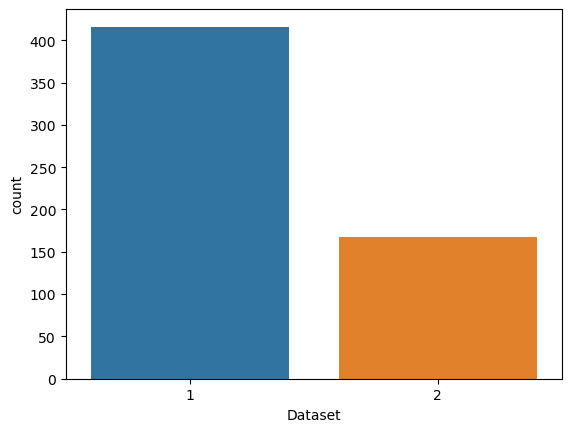

In [8]:
# Frequency of patients diagnosed and not diagnoised with liver disease

sns.countplot(data=liver_df, x = 'Dataset', label='Count')

LD, NLD = liver_df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients that are male:  441
Number of patients that are female:  142


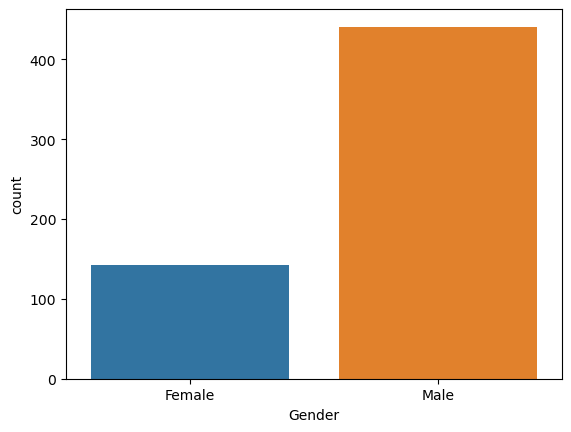

In [9]:
# Frequency of patients based on their gender

sns.countplot(data=liver_df, x = 'Gender', label='Count')

M, F = liver_df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

# Categorical Plot

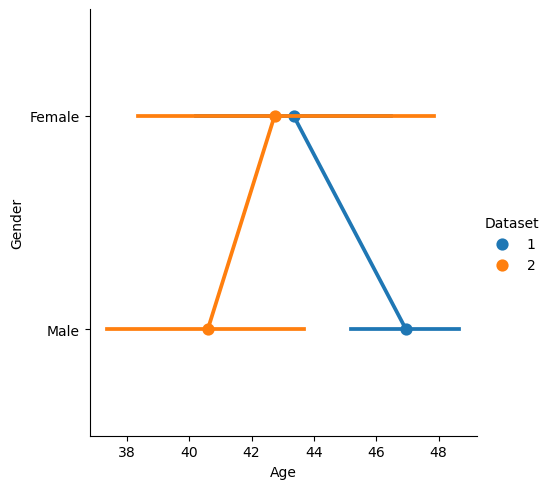

In [10]:
sns.catplot(x="Age", y="Gender", hue="Dataset", data=liver_df, kind="point")

- Age seems to be a factor for liver disease for both male and female genders

In [11]:
# Perform a grouping and counting operation on the "liver_df" DataFrame
liver_df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).count().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
2,2,Female,50
3,2,Male,117
0,1,Female,92
1,1,Male,324


In [12]:
liver_df[['Gender', 'Dataset','Age']].groupby(['Dataset','Gender'], as_index=False).mean().sort_values(by='Dataset', ascending=False)

,Dataset,Gender,Age
2,2,Female,42.740000
3,2,Male,40.598291
0,1,Female,43.347826
1,1,Male,46.950617


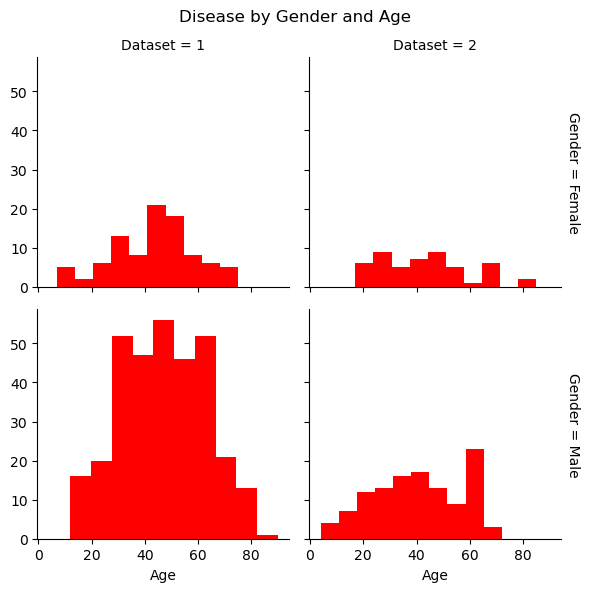

In [13]:
g = sns.FacetGrid(liver_df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

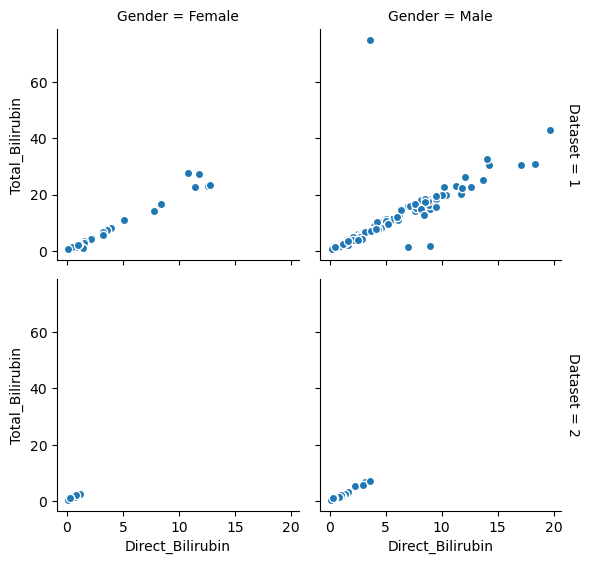

In [14]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

- There seems to be direct relationship between Total_Bilirubin and Direct_Bilirubin. We have the possibility of removing one of this feature.

C:\Users\viki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\viki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


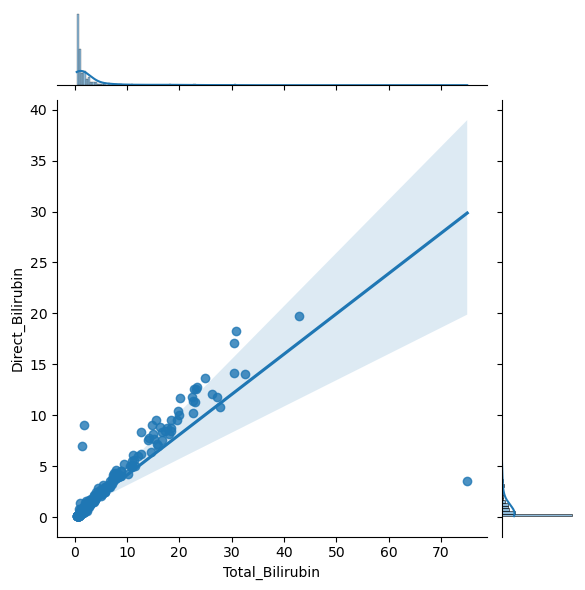

In [15]:
sns.jointplot(x="Total_Bilirubin", y="Direct_Bilirubin", data=liver_df, kind="reg")

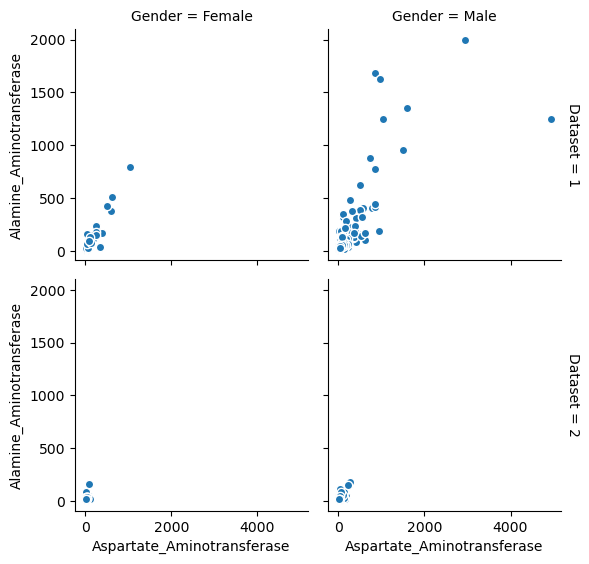

In [16]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

- There is linear relationship between Aspartate_Aminotransferase and Alamine_Aminotransferase and the gender. We have the possibility of removing one of this feature.

C:\Users\viki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\viki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


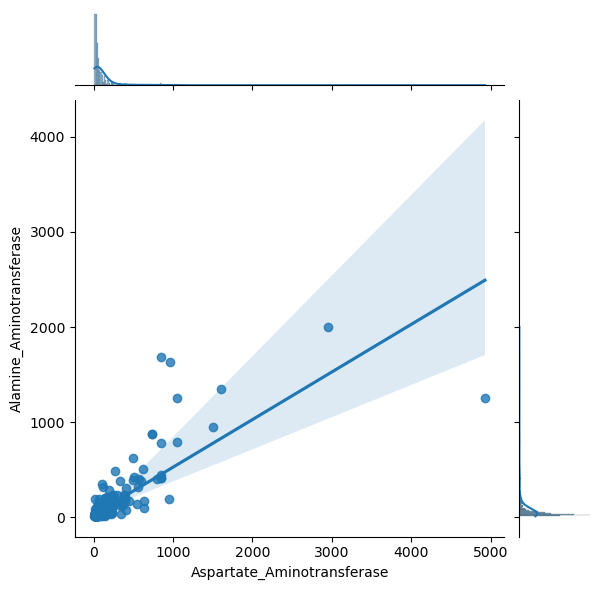

In [17]:
sns.jointplot(x="Aspartate_Aminotransferase", y="Alamine_Aminotransferase", data=liver_df, kind="reg")

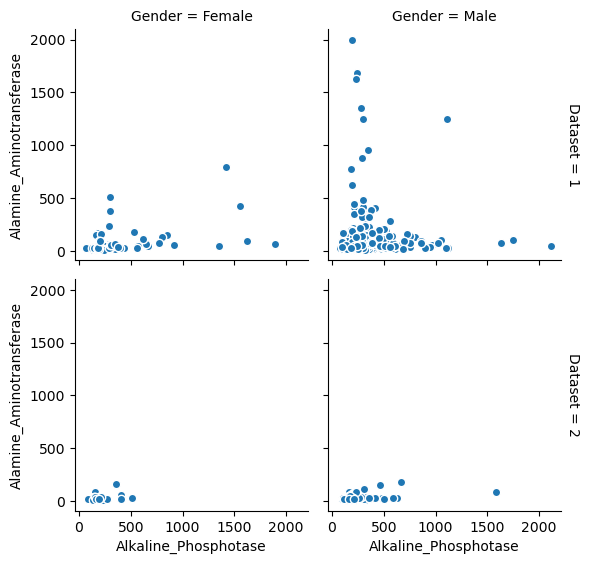

In [18]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

C:\Users\viki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\viki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


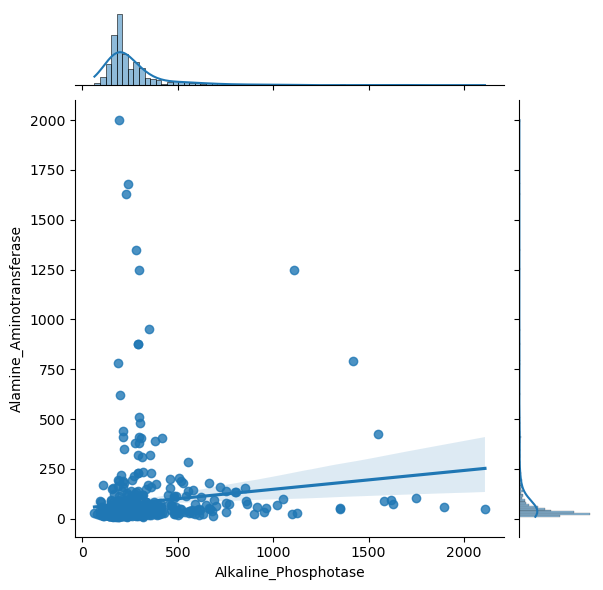

In [19]:
sns.jointplot(x="Alkaline_Phosphotase", y="Alamine_Aminotransferase", data=liver_df, kind="reg")

- No linear correlation between Alkaline_Phosphotase and Alamine_Aminotransferase

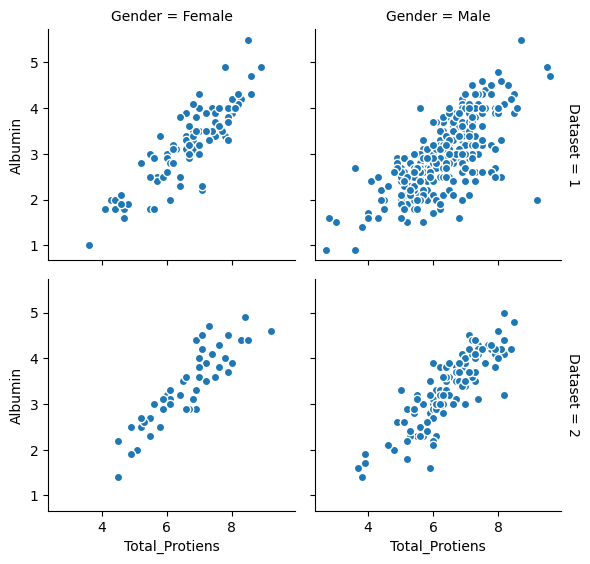

In [20]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Total_Protiens", "Albumin",  edgecolor="w")
plt.subplots_adjust(top=0.9)

- There is linear relationship between Total_Protiens and Albumin and the gender. We have the possibility of removing one of this feature.

C:\Users\viki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\viki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


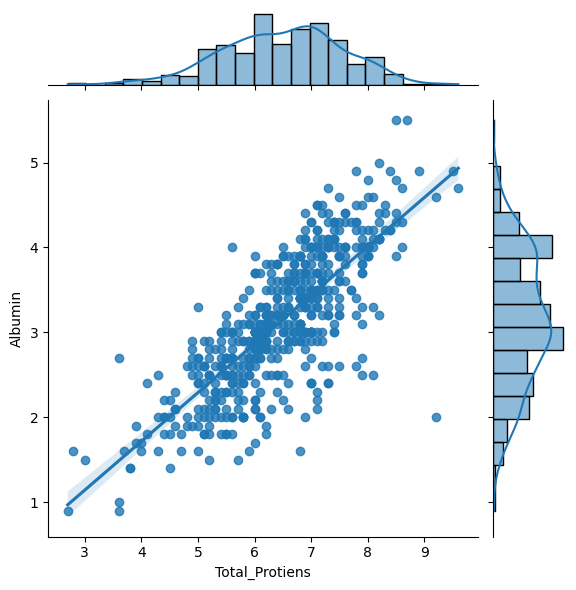

In [21]:
sns.jointplot(x="Total_Protiens", y="Albumin", data=liver_df, kind="reg")

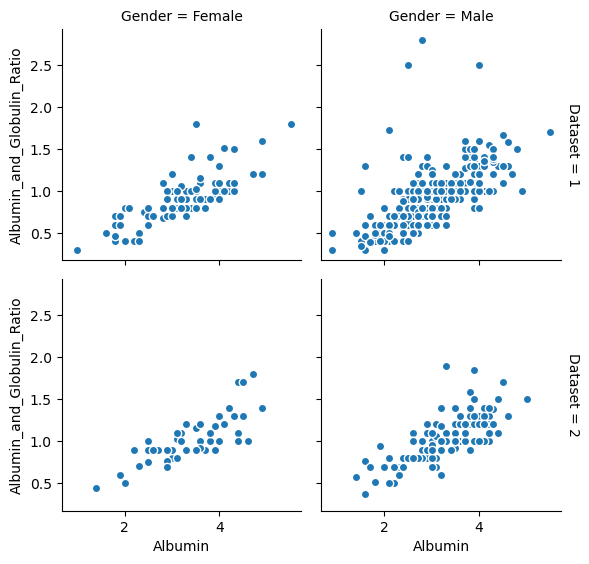

In [22]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin", "Albumin_and_Globulin_Ratio",  edgecolor="w")
plt.subplots_adjust(top=0.9)

- There is linear relationship between Albumin_and_Globulin_Ratio and Albumin. We have the possibility of removing one of this feature.

C:\Users\viki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\viki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


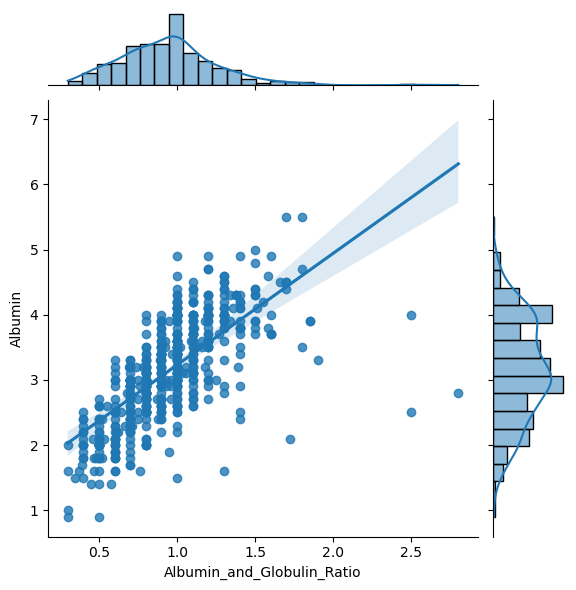

In [23]:
sns.jointplot(x="Albumin_and_Globulin_Ratio", y="Albumin", data=liver_df, kind="reg")

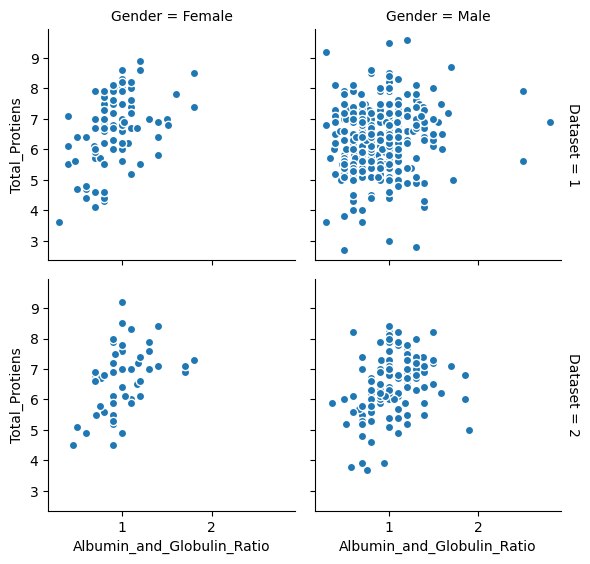

In [24]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin_and_Globulin_Ratio", "Total_Protiens",  edgecolor="w")
plt.subplots_adjust(top=0.9)

# Observation:

From the above jointplots and scatterplots, we find direct relationship between the following features:
* Direct_Bilirubin & Total_Bilirubin
* Aspartate_Aminotransferase & Alamine_Aminotransferase
* Total_Protiens & Albumin
* Albumin_and_Globulin_Ratio & Albumin

Hence, we can very well find that we can omit one of the features. I'm going to keep the follwing features:
* Total_Bilirubin
* Alamine_Aminotransferase
* Total_Protiens
* Albumin_and_Globulin_Ratio
* Albumin

In [25]:
liver_df.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1


- Convert categorical variable "Gender" to indicator variables

In [26]:
liver_df=pd.get_dummies(liver_df,columns=['Gender'])

In [27]:
liver_df.head()
liver_df['Dataset'].replace(2,0,inplace=True)
liver_df['Gender_Female'].replace({True:1,False:0},inplace=True)

liver_df['Gender_Male'].replace({True:1,False:0},inplace=True)
liver_df

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,0,0,1
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,1,0,1
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,1,0,1
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,1,0,1


In [28]:
liver_df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.713551,0.243568,0.756432
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490,0.429603,0.429603
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000,0.000000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000,0.000000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000,0.000000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000,0.000000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000,1.000000,1.000000


- Finding the null values in 'Albumin_and_Globulin_Ratio'

In [29]:
liver_df[liver_df['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
209,45,0.9,0.3,189,23,33,6.6,3.9,NaN,1,1,0
241,51,0.8,0.2,230,24,46,6.5,3.1,NaN,1,0,1
253,35,0.6,0.2,180,12,15,5.2,2.7,NaN,0,1,0
312,27,1.3,0.6,106,25,54,8.5,4.8,NaN,0,0,1


In [76]:
liver_df["Albumin_and_Globulin_Ratio"] = liver_df.Albumin_and_Globulin_Ratio.fillna(liver_df['Albumin_and_Globulin_Ratio'].mean())
print(liver_df['Albumin_and_Globulin_Ratio'].mean())

0.9470639032815198


In [33]:
# The input variables/features are all the inputs except Dataset.
# The prediction or label is 'Dataset' that determines whether the patient has liver disease or not.
# Dropping Gender and Dataset
from scipy.stats import shapiro
stat1,p1=shapiro(np.array(liver_df['Total_Bilirubin']))
print(p1)  
stat2,p2=shapiro(np.array(liver_df['Direct_Bilirubin']))
print(p2)
stat3,p3=shapiro(np.array(liver_df['Total_Protiens']))
print(p3)
stat4,p4=shapiro(np.array(liver_df['Albumin']))
print(p4)
stat5,p5=shapiro(np.array(liver_df['Aspartate_Aminotransferase']))
print(p5)
stat6,p6=shapiro(np.array(liver_df['Albumin_and_Globulin_Ratio']))
print(p6)
stat7,p7=shapiro(np.array(liver_df['Alkaline_Phosphotase']))
print(p7)
stat8,p8=shapiro(np.array(liver_df['Alamine_Aminotransferase']))
print(p8)
stat9,p9=shapiro(np.array(liver_df['Age']))
print(p9)



               
               
X = liver_df.drop(['Direct_Bilirubin','Dataset','Aspartate_Aminotransferase'], axis=1)
X.head(3)

1.5773978206485132e-38
1.1563177719145935e-36
0.0037137106992304325
0.0062446389347314835
1.4839750737199813e-42
1.0292079824026149e-13
5.217479889760206e-35
1.402699762789142e-41
0.003669116646051407


,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,65,0.7,187,16,6.8,3.3,0.90,1,0
1,62,10.9,699,64,7.5,3.2,0.74,0,1
2,62,7.3,490,60,7.0,3.3,0.89,0,1


In [34]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
y = liver_df['Dataset']
smote = SMOTE(random_state=42)
x, y = smote.fit_resample(X,y)
X=StandardScaler().fit_transform(x)
# 1 for liver disease; 2 for no liver disease

In [35]:
# Correlation

'''liver_corr = X.corr()
liver_corr'''

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

In [36]:
''''plt.figure(figsize=(30, 30))
sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},cmap= 'coolwarm')
plt.title('Correlation between features')'''

NameError: name 'liver_corr' is not defined

<Figure size 3000x3000 with 0 Axes>

The above correlation also indicates the following correlation
- Total_Protiens & Albumin
- Alamine_Aminotransferase & Aspartate_Aminotransferase
- Direct_Bilirubin & Total_Bilirubin
- There is some correlation between Albumin_and_Globulin_Ratio and Albumin. But its not as high as Total_Protiens & Albumin

# Machine Learning

In [37]:
# Importing modules
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=101)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(83, 9)
(83,)
(749, 9)
(749,)


# Logistic Regression

In [39]:
# Create logistic regression object

logreg = LogisticRegression(max_iter=1000)

In [40]:
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [41]:
#Predict Output

log_predicted= logreg.predict(X_test)
logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)

In [42]:
#Equation coefficient and Intercept

print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))



Logistic Regression Training Score: 
 79.52
Logistic Regression Test Score: 
 73.83
Coefficient: 
 [[ 0.21145429  0.76892378  1.10360746  1.08745649  0.32375625 -0.46183813
   0.02192713  0.95733161  1.16188965]]
Intercept: 
 [0.127748]
Accuracy: 
 0.7383177570093458
Confusion Matrix: 
 [[319  50]
 [146 234]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.86      0.76       369
           1       0.82      0.62      0.70       380

    accuracy                           0.74       749
   macro avg       0.75      0.74      0.73       749
weighted avg       0.76      0.74      0.73       749



In [43]:
print(logreg.predict(X_train))

[0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 1 0]


In [44]:
from sklearn.model_selection import GridSearchCV
param_grid_reg = (  
    {
     'C' : np.logspace(-4, 4, 20),
     'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
     'max_iter' : [1000]
    }
)
grids_reg=GridSearchCV(estimator=logreg,param_grid=param_grid_reg,n_jobs=1,cv=2,scoring="accuracy",error_score=0)
res_reg=grids_reg.fit(X_train,y_train)
final_model=logreg.set_params(**res_reg.best_params_)
print(res_reg.best_params_)
#fin_model=model.set_params(**res_reg.best_params_)
final_model.fit(X_train,y_train)

C:\Users\viki\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\viki\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\viki\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\viki\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\viki\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\viki\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

{'C': 0.0001, 'max_iter': 1000, 'solver': 'liblinear'}


C:\Users\viki\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\viki\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\viki\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.0001, max_iter=1000, solver='liblinear')

In [70]:
from sklearn.metrics import roc_auc_score
print(classification_report(final_model.predict(X_test),y_test))
y_prob_reg = final_model.predict_proba(X_test)[:, 1]
auc_roc_reg = roc_auc_score(y_test, y_prob_reg)
print('AUC-ROC: \n', auc_roc_reg)

              precision    recall  f1-score   support

           0       0.83      0.65      0.73       477
           1       0.56      0.78      0.65       272

    accuracy                           0.69       749
   macro avg       0.69      0.71      0.69       749
weighted avg       0.73      0.69      0.70       749

AUC-ROC: 
 0.7379546427043218


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2)
knn_params={
    "n_neighbors":range(1,20,2),
    "weights":["uniform","distance"],
    "algorithm":["auto","ball_tree","kd_tree","brute"],
    "metric":["euclidean","minkowski","manhattan"],
    "leaf_size":range(1,30,5)
}
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold
grids=GridSearchCV(estimator=model,param_grid=knn_params,n_jobs=1,cv=3,scoring="accuracy",error_score=0)
res=grids.fit(X_train,y_train)
par_model=model.set_params(**res.best_params_)
par_model.fit(X_train,y_train)
ypredict=par_model.predict(X_test)
print(classification_report(y_test,ypredict))
print(classification_report(y_train,par_model.predict(X_train)))
cm1=confusion_matrix(y_test,ypredict)
print(cm1)


In [ ]:

print(res.best_params_)
y_prob_knn = par_model.predict_proba(X_test)[:, 1]
auc_roc_knn = roc_auc_score(y_test, y_prob_knn)
print('AUC-ROC: \n', auc_roc_knn)

In [51]:
from sklearn.metrics import roc_auc_score
y_prob = logreg.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_prob)
print('AUC-ROC: \n', auc_roc)

AUC-ROC: 
 0.7379546427043218


<Axes: >

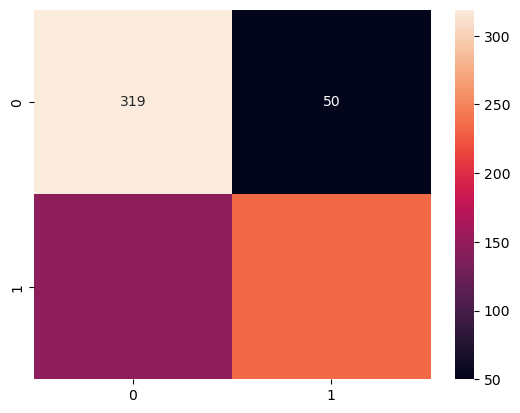

In [52]:
sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

In [75]:
# Examine the coefficients (or feature importances) of a logistic regression model
#coeff_df = pd.DataFrame(X.columns)
#coeff_df.columns = ['Feature']
#coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
#pd.Series(logreg.coef_[0])

#coeff_df.sort_values(by='Correlation', ascending=False)

Cross Validation Score

In [54]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5)  # 5-fold cross-validation
mean_cv_score = np.mean(cv_scores)

print(f'Mean Cross-Validation Score: {mean_cv_score:.2f}')

Mean Cross-Validation Score: 0.66


In [55]:
from sklearn.ensemble import RandomForestClassifier
rcf= RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75, min_samples_leaf=7, min_samples_split=3, n_estimators = 130)
rcf.fit(X_train,y_train)
ypredicted=rcf.predict(X_test)
print(ypredicted)
test_score=accuracy_score(ypredicted,y_test)
train_score=accuracy_score(y_train,rcf.predict(X_train))
print(classification_report(ypredicted,y_test))

[0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1
 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0
 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1
 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1
 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0
 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1
 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0
 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0
 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1
 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1
 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 

In [56]:
y_prob_rfc = rcf.predict_proba(X_test)[:, 1]
auc_roc_rfc = roc_auc_score(y_test, y_prob_rfc)
print('AUC-ROC: \n', auc_roc_rfc)

AUC-ROC: 
 0.7595385822279276


In [57]:
cm2=confusion_matrix(ypredicted,y_test)
print("confusion matrix\n")
print(cm2)

confusion matrix

[[296 144]
 [ 73 236]]


# Decision Tree Classifier

In [58]:
# Create decision tree object

dt=DecisionTreeClassifier()

In [59]:
# Train the model using the training sets and check score

dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [60]:
# Predict Output

y_pred=dt.predict(X_test)

dt_score = round(dt.score(X_train, y_train) * 100, 2)
dt_test = round(dt.score(X_test, y_test) * 100, 2)

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6034712950600801

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[227, 142],
       [155, 225]], dtype=int64)

In [63]:
#Equation coefficient and Intercept
print('Decision Tree Training Score: \n', dt_score)
print('Decision Tree Test Score: \n', dt_test)
print('Accuracy: \n', accuracy_score(y_test,y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))
print('Classification Report: \n', classification_report(y_test,y_pred))

Decision Tree Training Score: 
 100.0
Decision Tree Test Score: 
 60.35
Accuracy: 
 0.6034712950600801
Confusion Matrix: 
 [[227 142]
 [155 225]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.62      0.60       369
           1       0.61      0.59      0.60       380

    accuracy                           0.60       749
   macro avg       0.60      0.60      0.60       749
weighted avg       0.60      0.60      0.60       749



In [64]:
from sklearn.metrics import roc_auc_score
# Calculate AUC-ROC
y_prob = dt.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_prob)
print('AUC-ROC: \n', auc_roc)

AUC-ROC: 
 0.6036407074597061


# Cross validation score

In [65]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(dt, X_train, y_train, cv=5)  # 5-fold cross-validation
mean_cv_score = np.mean(cv_scores)

print(f'Mean Cross-Validation Score: {mean_cv_score:.2f}')


Mean Cross-Validation Score: 0.62


# Performance Metric for Decision Tree Classifier

In [66]:
from sklearn.metrics import roc_auc_score
print('Accuracy: \n', accuracy_score(y_test,y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))
print('Classification Report: \n', classification_report(y_test,y_pred))
# Calculate AUC-ROC
y_prob = dt.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_prob)
print('AUC-ROC: \n', auc_roc)

Accuracy: 
 0.6034712950600801
Confusion Matrix: 
 [[227 142]
 [155 225]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.62      0.60       369
           1       0.61      0.59      0.60       380

    accuracy                           0.60       749
   macro avg       0.60      0.60      0.60       749
weighted avg       0.60      0.60      0.60       749

AUC-ROC: 
 0.6036407074597061


# Performance Metric for Logistic Regression

In [67]:
from sklearn.metrics import roc_auc_score
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))
y_prob = logreg.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_prob)
print('AUC-ROC: \n', auc_roc)

Accuracy: 
 0.7383177570093458
Confusion Matrix: 
 [[319  50]
 [146 234]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.86      0.76       369
           1       0.82      0.62      0.70       380

    accuracy                           0.74       749
   macro avg       0.75      0.74      0.73       749
weighted avg       0.76      0.74      0.73       749

AUC-ROC: 
 0.7379546427043218


# Model evaluation

In [68]:
# We can now rank our evaluation of all the models to choose the best one for our problem.

models = pd.DataFrame({
    'Model': [ 'Logistic Regression','Decision Tree'],
    'Training Score': [ logreg_score,dt_score],
    
    'Test Score': [ logreg_score_test,dt_test]})
models.sort_values(by='Test Score', ascending=False)

,Model,Training Score,Test Score
0,Logistic Regression,79.52,73.83
1,Decision Tree,100.00,60.35


In [69]:
rfc=pd.DataFrame({
    'Model':['random forest clasifier'],
    'Training Score':[train_score*100],
    'Test Score':[test_score*100]})
print(rfc)


                     Model  Training Score  Test Score
0  random forest clasifier       85.542169   71.028037


In [ ]:
import pickle as pkl

In [71]:
import joblib
joblib.dump(logreg, 'model_reg.pkl')

['model_rcf1.pkl']

In [ ]:
X_train

In [ ]:
liver_df

In [ ]:
X_test